In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import glob

In [2]:
permDir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/permutations"

In [3]:
qtls = pd.read_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/pval_corrected_perm/CombinedToAll.txt", sep="\t")
qtls.head()

,phenotype,marker,chr,pos,combined.freq,combined.logp,combined.beta,combined.se,combined.sample,ox.freq,...,ox2.freq,ox2.logp,ox2.beta,ox2.se,ox2.sample,uc.freq,uc.logp,uc.beta,uc.se,uc.sample
0,EDL,chr11_33709379,11,33709379,0.181,3.560211,0.141085,0.038738,2851,0.178,...,0.186,0.427149,0.054728,0.061528,912.0,0.186,0.914235,0.136155,0.087932,1020
1,EDL,chr11_43436687,11,43436687,0.481,3.004998,0.106827,0.032399,2851,0.525,...,0.517,0.525435,0.060649,0.058271,912.0,0.508,0.348941,0.041220,0.054277,1020
2,EDL,chr11_72929229,11,72929229,0.115,4.567028,-0.177185,0.042152,2851,0.116,...,0.120,0.148740,0.027267,0.073305,912.0,0.114,2.177490,-0.200646,0.073775,1020
3,EDL,chr11_79962804,11,79962804,0.436,3.557128,-0.097410,0.026759,2851,0.439,...,0.440,0.190619,0.021869,0.047412,912.0,0.431,1.838954,-0.113055,0.046162,1020
4,EDL,chr11_89058093,11,89058093,0.198,4.186135,-0.164696,0.041181,2851,0.783,...,0.780,0.587898,0.075097,0.066389,912.0,0.834,1.160523,-0.155121,0.085246,1020


In [4]:
numQtls = qtls.shape[0]
numQtls

2206

In [5]:
p_adj = []
for i in range(numQtls):
    f = open(permDir+"/perm_p_"+str(i)+".txt", "r")
    p_adj.append(float(f.readline()))
    f.close()
    

In [6]:
qtls["combined_p_adj"] = p_adj

In [7]:
qtls["combined_p_adj"].describe()

count    2206.000000
mean        0.000273
std         0.000259
min         0.000000
25%         0.000049
50%         0.000182
75%         0.000465
max         0.000864
Name: combined_p_adj, dtype: float64

In [8]:
qtls["combined_p"] = 10**(-1*qtls["combined.logp"])

In [12]:
spearmanr(qtls["combined_p"] , qtls["combined_p_adj"])

SpearmanrResult(correlation=0.999955763970858, pvalue=0.0)

In [13]:
qtls["combined_p"].describe()

count    2.206000e+03
mean     3.387865e-04
std      3.060229e-04
min      3.429215e-40
25%      4.947033e-05
50%      2.602803e-04
75%      5.810382e-04
max      9.989644e-04
Name: combined_p, dtype: float64

/u/home/j/jzou1115/project-ernst/software/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


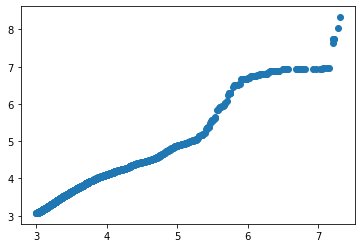

In [14]:
plt.scatter(-np.log10(qtls["combined_p"]) , -np.log10(qtls["combined_p_adj"]))

In [15]:
#phenotype	chr	bp	logP	fdr.adj	threshold	start	end	dist
qtls["threshold"] = 0.01
out = qtls.loc[:,["phenotype", "chr", "pos", "combined.logp", "combined_p_adj", "threshold"]]

In [18]:
out.columns = ["phenotype", "chr", "bp", "logP", "fdr.adj", "threshold"]

In [33]:
dist=int(2e+06)
dist2 = int(dist/2)
start = out["bp"] - dist2
min(start)

2047891

In [34]:
end = out["bp"] + dist2

In [35]:
out["start"] = start
out["end"] = end
out["dist"] = dist

In [36]:
out.head()

,phenotype,chr,bp,logP,fdr.adj,threshold,start,end,dist
0,EDL,11,33709379,3.560211,0.000193,0.01,32709379,34709379,2000000
1,EDL,11,43436687,3.004998,0.000853,0.01,42436687,44436687,2000000
2,EDL,11,72929229,4.567028,0.000034,0.01,71929229,73929229,2000000
3,EDL,11,79962804,3.557128,0.000196,0.01,78962804,80962804,2000000
4,EDL,11,89058093,4.186135,0.000059,0.01,88058093,90058093,2000000


In [37]:
out.to_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/data/qtls/qtls_perm.txt", index=False, header=True, sep="\t")

# compute null dist p

In [2]:
null_dir="/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/permutations/combined"

In [7]:
files = glob.glob(null_dir+"/*.combined.assoc.txt.gz")
print(len(files))

32


In [8]:
null_p = []
for f in files:
    d = pd.read_table(f)
    null_p.append(min(d["p_wald"]))

In [10]:
out = open("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/permutations/combined/null_pvals.txt", "w")
for p in null_p:
    out.write(str(p)+"\n")
out.close()

In [2]:
null_p_df = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/permutations/combined/null_pvals.txt", header=None)
null_p = null_p_df[0]

In [8]:
len(null_p)

32

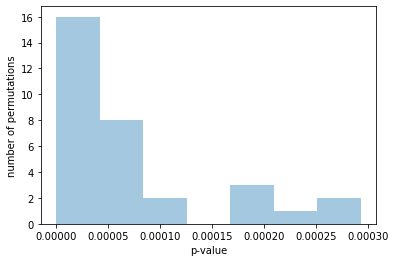

In [10]:
sns.distplot(null_p, kde=False)
plt.xlabel("p-value")
plt.ylabel("number of permutations")
plt.savefig("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019_Summary_Statistics/permutations/combined/null_pvals.pdf")

In [51]:
qtls = pd.read_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/pval_corrected_perm/CombinedToAll.txt", sep="\t")
qtls["combined_p"] = 10**(-1*qtls["combined.logp"])
qtls.head()

,phenotype,marker,chr,pos,combined.freq,combined.logp,combined.beta,combined.se,combined.sample,ox.freq,...,ox2.logp,ox2.beta,ox2.se,ox2.sample,uc.freq,uc.logp,uc.beta,uc.se,uc.sample,combined_p
0,EDL,chr11_33709379,11,33709379,0.181,3.560211,0.141085,0.038738,2851,0.178,...,0.427149,0.054728,0.061528,912.0,0.186,0.914235,0.136155,0.087932,1020,0.000275
1,EDL,chr11_43436687,11,43436687,0.481,3.004998,0.106827,0.032399,2851,0.525,...,0.525435,0.060649,0.058271,912.0,0.508,0.348941,0.041220,0.054277,1020,0.000989
2,EDL,chr11_72929229,11,72929229,0.115,4.567028,-0.177185,0.042152,2851,0.116,...,0.148740,0.027267,0.073305,912.0,0.114,2.177490,-0.200646,0.073775,1020,0.000027
3,EDL,chr11_79962804,11,79962804,0.436,3.557128,-0.097410,0.026759,2851,0.439,...,0.190619,0.021869,0.047412,912.0,0.431,1.838954,-0.113055,0.046162,1020,0.000277
4,EDL,chr11_89058093,11,89058093,0.198,4.186135,-0.164696,0.041181,2851,0.783,...,0.587898,0.075097,0.066389,912.0,0.834,1.160523,-0.155121,0.085246,1020,0.000065


In [52]:
def adjustP(p, null):
    count = 0
    for n in null:
        if n < p:
            count +=1
    return count*1.0/len(null)

In [53]:
combined_perm_p = []
for i in qtls.index:
    combined_perm_p.append(adjustP(qtls.loc[i, "combined_p"], null_p))

In [54]:
qtls["combined_perm_p"] = combined_perm_p

In [55]:
sig = qtls[qtls["combined_perm_p"] < 0.05]
sig.to_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/pval_corrected_perm/CombinedToAll_sig0.05.txt", sep="\t", header=True, index=False)

In [56]:
sig = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/pval_corrected_perm/CombinedToAll_sig0.05.txt")
sig.head()

,phenotype,marker,chr,pos,combined.freq,combined.logp,combined.beta,combined.se,combined.sample,ox.freq,...,ox2.beta,ox2.se,ox2.sample,uc.freq,uc.logp,uc.beta,uc.se,uc.sample,combined_p,combined_perm_p
0,EDL,chr12_82909124,12,82909124,0.268,6.049546,-0.156125,0.031701,2851,0.739,...,-0.052690,0.056066,912.0,0.719,2.826455,-0.167495,0.052588,1020,8.921823e-07,0.03125
1,EDL,chr12_83882835,12,83882835,0.299,9.300294,-0.179910,0.028829,2851,0.695,...,-0.098869,0.049201,912.0,0.710,5.119354,-0.228324,0.050745,1020,5.008478e-10,0.00000
2,EDL,chr13_113025220,13,113025220,0.136,6.119717,-0.182128,0.036744,2851,0.140,...,-0.026255,0.062301,912.0,0.130,3.487577,-0.232333,0.064421,1020,7.590725e-07,0.03125
3,EDL,chr13_114188942,13,114188942,0.140,5.948010,-0.177099,0.036301,2851,0.143,...,-0.058163,0.063150,912.0,0.134,3.760856,-0.225565,0.059850,1020,1.127172e-06,0.03125
4,EDL,chr2_155353842,2,155353842,0.182,7.081535,-0.187698,0.034922,2851,0.214,...,-0.086047,0.059084,912.0,0.126,1.279708,-0.138041,0.071113,1020,8.288296e-08,0.03125


In [64]:
#filter qtls that do not have info score > 90 
sig["info90"] = False
for chrm in set(sig["chr"]):
    sig_chrm = sig[sig["chr"]==chrm]
    geno = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019/genotypes/oxinfo90/combined.chr"+str(chrm)+".oxinfo90.annot", header=None)
    markers = set([ list(geno[0])
    for m in sig_chrm["marker"]:
        if str(m) in markers:
            sig["info90"] = True

In [89]:
markers90 = {}
sig["info90"] = False
for i in sig.index:
    chrm = sig.loc[i, "chr"]
    if chrm not in markers90.keys():
        geno = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_2019/genotypes/oxinfo90/combined.chr"+str(chrm)+".oxinfo90.annot", header=None)
        markers90[chrm] = set(geno[0])

    markers = markers90[chrm]
    m = sig.loc[i, "marker"]

    if m in markers:
        sig.loc[i, "info90"] = True

In [90]:
sum(sig["info90"])

39

In [91]:
sig_info90 = sig[sig["info90"]==True]
sig_info90.shape

(39, 32)

In [92]:
sig_info90.to_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/pval_corrected_perm/CombinedToAll_sig0.05_info90.txt", sep="\t", header=True, index=False)

In [93]:
# make qtl input file
#columns:
#phenotype chr bp logP fdr.adj threshold start end dist
out = pd.DataFrame({})
out["phenotype"]= sig_info90["phenotype"]
out["chr"] = sig_info90["chr"]
out["bp"] = sig_info90["pos"]
out["logP"] = sig_info90["combined.logp"]
out["fdr.adj"] = sig_info90["combined_perm_p"]
out["threshold"] = 0.05
out["start"] = sig_info90["pos"] - 1000000
out["end"] = sig_info90["pos"] + 1000000
out["dist"] = 2000000

In [94]:
out.to_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_intervals/data/qtls/qtls_perm.txt", header=True, index=False, sep="\t")

In [96]:
out

,phenotype,chr,bp,logP,fdr.adj,threshold,start,end,dist
2,EDL,13,113025220,6.119717,0.03125,0.05,112025220,114025220,2000000
3,EDL,13,114188942,5.948010,0.03125,0.05,113188942,115188942,2000000
7,EDL,2,77669072,8.537920,0.00000,0.05,76669072,78669072,2000000
9,EDL,2,80039850,7.998939,0.00000,0.05,79039850,81039850,2000000
19,TA,11,88973232,7.587957,0.00000,0.05,87973232,89973232,2000000
37,activity.begin,11,96964818,6.295724,0.03125,0.05,95964818,97964818,2000000
41,activity.begin,2,153696216,6.030024,0.03125,0.05,152696216,154696216,2000000
47,activity.end,11,96653605,7.969123,0.00000,0.05,95653605,97653605,2000000
48,activity.end,13,10746304,6.054185,0.03125,0.05,9746304,11746304,2000000
66,activity.middle,9,81879809,5.867419,0.03125,0.05,80879809,82879809,2000000
